# CNN ASSIGNMENT


Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Importing all the important libraries and directories from google drive

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import PIL
from PIL import Image
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [3]:

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
print(data_dir_train)
print(data_dir_test)
!ls

/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test
gdrive	sample_data


In [6]:
#checking the length of the data imported through glob function in the data_dir_train
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Creating the dataset



In [7]:
# parameters for the dataset
batch_size = 32
img_height = 180
img_width = 180

In [8]:
#  train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2, #performing a 80/20 split for training and validation dataset
  subset = 'training',
  image_size= (img_height, img_width),
  batch_size= batch_size)

Found 7239 files belonging to 9 classes.
Using 5792 files for training.


In [9]:
#validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size= (img_height, img_width),
  batch_size= batch_size)

Found 7239 files belonging to 9 classes.
Using 1447 files for validation.


In [10]:
1792 + 447 # cross-checking the total images to be 2239

2239

In [14]:
# List of all the classes of skin cancer

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualizing one image from each (9)class present in the dataset


In [13]:
for images, labels in train_ds.take(1):
  print(images.shape)
  print(labels.shape)
  print(images[0].shape)
 # plt.imshow(images[0].numpy().astype('uint8'))
 # plt.title(class_names[labels[i]])

(32, 180, 180, 3)
(32,)
(180, 180, 3)


The tensor's first dimension represent's the batch size while 180,180 is the image size. 3 represents the default RGB channels which are used.

In [15]:
#data_dir_train.glob(i/*.jpg')
im_l=[]
for i in class_names:
  b = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" + i +'/*.jpg'
  for filename in glob(b):
    im= Image.open(filename)
    im_l.append(im)
    break
im_l
 

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F328963E890>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F32D02ED450>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F32D02ED550>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7F32D02ED650>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x7F32D02EDED0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F32D02F6AD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F32D02F6BD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F32D02F6CD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F32D02F6DD0>]

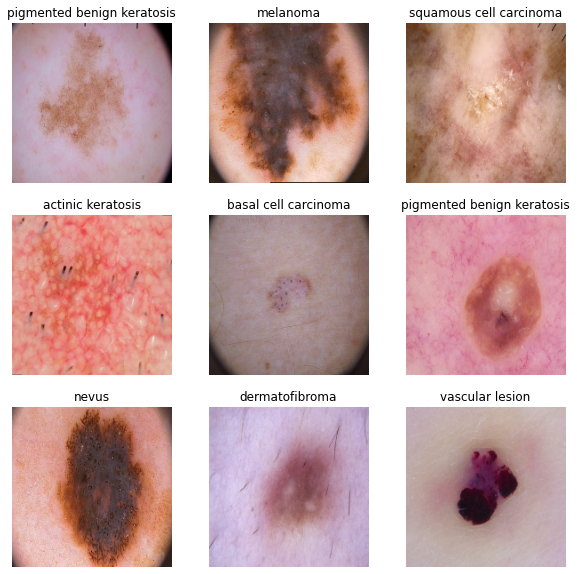

In [16]:

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
# using cache() and prefetch function to optimise the CPU processing.
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating the model
####  to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`. Since all pictures are in RGB format we can divide by 255

In [ ]:
num_cla = 9

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),# normalising RGB values for neural network
                    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
                    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),#padding is same as the edge of the image is very important to detect melanoma
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding = 'same', activation = 'relu'), #padding is same as the edge of the image is very important to detect melanoma
                    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(num_cla)
])


### Compiling the model


In [ ]:
#SparseCategoricalCrossentropy logits true allow us to inform the system that the output are not normalised, softmax is therefore not required. adam optimisation was the most suitable optimisation for this,
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0

### Training the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 138s 2s/step - loss: 2.0698 - accuracy: 0.2333 - val_loss: 1.7977 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 1.6151 - accuracy: 0.4353 - val_loss: 1.4722 - val_accuracy: 0.4877
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.4852 - accuracy: 0.4816 - val_loss: 1.5092 - val_accuracy: 0.4899
Epoch 4/20
56/56 [==============================] - 2s 36ms/step - loss: 1.3372 - accuracy: 0.5262 - val_loss: 1.4403 - val_accuracy: 0.5414
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.2540 - accuracy: 0.5619 - val_loss: 1.3969 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 2s 36ms/step - loss: 1.1700 - accuracy: 0.5898 - val_loss: 1.6931 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.0884 - accuracy: 0.6116 - val_loss: 1.6362 - val_accuracy: 0.5213
Epoch 8/20
56

### Visualizing training results

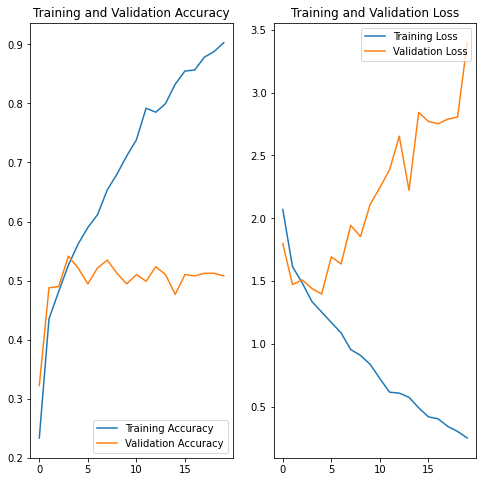

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The model was highly overfitting as we can infer by comparing the validation accuracy-50% to the exponentially higher training accuracy-90%

### Data Augmentation

In [ ]:
# data augmentation; due to the nature of the image the augmentatin i have chosen are contrast, zoom and flip
augmented_data = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical', input_shape= (img_height, img_width, 3)),
     layers.experimental.preprocessing.RandomContrast([0.8, 1.0]),
     layers.experimental.preprocessing.RandomZoom(0.2),
     layers.experimental.preprocessing.RandomTranslation(height_factor=(0.2), width_factor=(0.2), fill_mode='reflect')
     
     
                                   
                                   
])



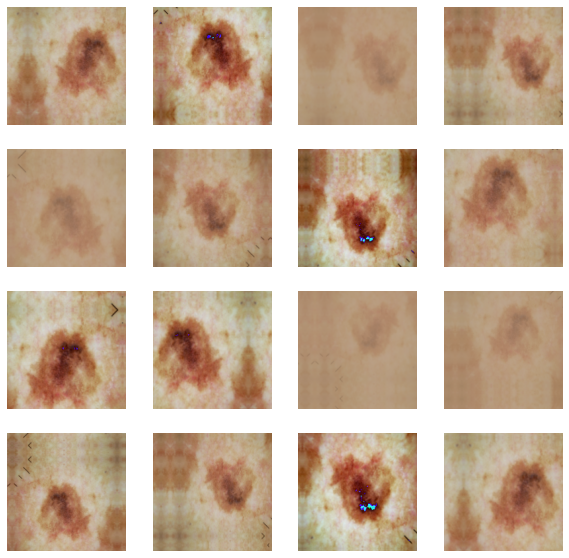

In [ ]:
# Todo, visualizing how yotheur augmentation worked.
plt.figure(figsize=(10,10))

for images, _ in train_ds.take(1):
  for i in range(16):
    augmented_images = augmented_data(images)
    ax = plt.subplot(4,4,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis("off");


### Creating, compiling and training the model


In [ ]:
# since there is an evidence of overfitting in the model we will use drop() function with augmented data to increase the data which will allow us to form a better model
model = Sequential([ 
                    augmented_data,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),# normalising RGB values for neural network
                    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
                    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),#padding is same as the edge of the image is very important to detect melanoma
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding = 'same', activation = 'relu'), #padding is same as the edge of the image is very important to detect melanoma
                    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(num_cla)
])



### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 42ms/step - loss: 2.1400 - accuracy: 0.1925 - val_loss: 2.0329 - val_accuracy: 0.2617
Epoch 2/20
56/56 [==============================] - 2s 39ms/step - loss: 1.9877 - accuracy: 0.2517 - val_loss: 1.8212 - val_accuracy: 0.3333
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 2.0111 - accuracy: 0.2260 - val_loss: 2.0076 - val_accuracy: 0.2483
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 1.9161 - accuracy: 0.2779 - val_loss: 1.9888 - val_accuracy: 0.2506
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 1.7950 - accuracy: 0.3382 - val_loss: 1.7156 - val_accuracy: 0.3848
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6433 - accuracy: 0.3956 - val_loss: 1.5305 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 2s 39ms/step - loss: 1.6124 - accuracy: 0.4107 - val_loss: 1.4982 - val_accuracy: 0.4720
Epoch 8/20
56

### Visualizing the results

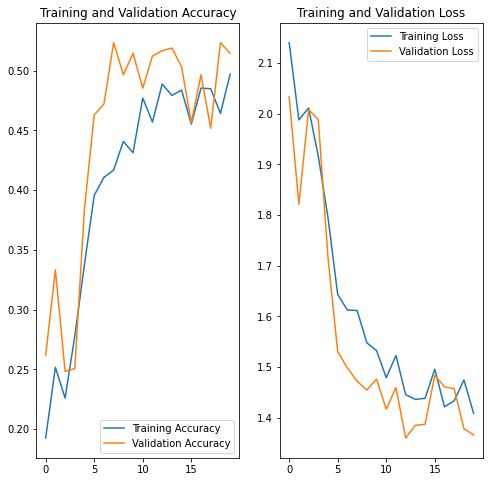

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Model after data augumentation though is not an overfitting model it has instead become an underfit with very poor accuracy for both training and validation datasets: 49%, 51% respectively. Therefore, we will not use this.

#### Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [31]:
# Creating a list of the folder names of each image using its path. 
path_l = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
type_of_ima_l = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
type_of_ima_l

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [36]:
# Creating a dataset with the image path and its folder name as columns
df_dict = dict(zip(path_l, type_of_ima_l))
df = pd.DataFrame(list(df_dict.items()), columns= ['Path', 'Label'])
df1 = df.copy(deep=True)
df['Label'] = df['Label'].map({'actinic keratosis':1,'basal cell carcinoma':2,'dermatofibroma':3, 'melanoma':4, 'nevus':5, 'pigmented benign keratosis':6, 'seborrheic keratosis':7, 'squamous cell carcinoma':8, 'vascular lesion':9})
df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,4
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,4
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,4
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,4
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,4
...,...,...
2234,/content/gdrive/MyDrive/Skin cancer ISIC The I...,9
2235,/content/gdrive/MyDrive/Skin cancer ISIC The I...,9
2236,/content/gdrive/MyDrive/Skin cancer ISIC The I...,9
2237,/content/gdrive/MyDrive/Skin cancer ISIC The I...,9


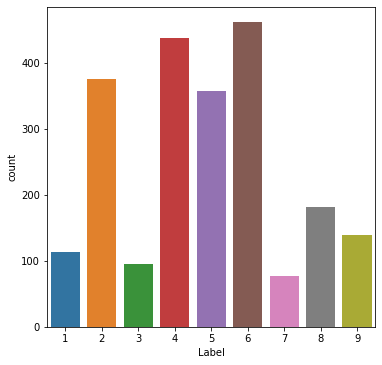

In [37]:
diff_df = pd.DataFrame(df.Label.value_counts().reset_index().values, columns=["Label", "count"])
dfindex = diff_df.sort_index(axis = 0, ascending=True)
#to visualize the difference among the classes
import seaborn as sns
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot(x = 'Label', y = 'count', data = dfindex)

As we can see that the data is hardly evenly distributed with seborrheic keratosis(7) being the lowest amount of data. While pigmented benign keratosis(6) and melanoma(4) have the highest and lowest amount of data.

#### Rectifying the class imbalance using a python package known as `Augmentor`

In [16]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [23]:
path_to_training_dataset= "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC9D747E410>: 100%|██████████| 500/500 [00:22<00:00, 21.91 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC9D752CA10>:   0%|          | 1/500 [00:00<00:53,  9.37 Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC9D75205D0>: 100%|██████████| 500/500 [00:22<00:00, 22.23 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCA100FEC50>: 100%|██████████| 500/500 [00:23<00:00, 21.45 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC9D7520210>: 100%|██████████| 500/500 [01:43<00:00,  4.84 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FC9D74C4FD0>: 100%|██████████| 500/500 [01:31<00:00,  5.45 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCA1011BB90>: 100%|██████████| 500/500 [00:22<00:00, 21.96 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FCA10143650>: 100%|██████████| 500/500 [00:48<00:00, 10.29 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC9D74AFF50>: 100%|██████████| 500/500 [00:22<00:00, 21.96 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC9D74A2A90>:   0%|          | 1/500 [00:00<01:17,  6.42 Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCA1011BF90>: 100%|██████████| 500/500 [00:22<00:00, 22.48 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [69]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [70]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010067.jpg_f87e6332-7dca-4373-9fd5-3cd0fed23d48.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0001138.jpg_f04ccc13-70e5-4f48-aa9c-7d8bb0e58a07.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010029.jpg_e3e0606c-0aa8-4c63-9682-3136d9cb55c8.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010609.jpg_9c16d60c-804b-4b8a-a506-a590ecd5683a.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0011094.jpg_518bc566-d675-45ab-aac9-d93f53966459.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International

In [71]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [72]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [73]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df1.append(df2)

In [74]:
new_df['Label'].value_counts()

actinic keratosis             1114
pigmented benign keratosis     962
melanoma                       938
basal cell carcinoma           876
nevus                          857
squamous cell carcinoma        681
vascular lesion                639
dermatofibroma                 595
seborrheic keratosis           577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Training the model on the data created using Augmentor

In [75]:
batch_size = 32
img_height = 180
img_width = 180
num_cla = 9

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),# normalising RGB values for neural network
                    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
                    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),#padding is same as the edge of the image is very important to detect melanoma
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding = 'same', activation = 'relu'), #padding is same as the edge of the image is very important to detect melanoma
                    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(num_cla)
])

####Creating a training dataset

In [77]:
#data_dir_train= path_list
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7239 files belonging to 9 classes.
Using 5792 files for training.


####Creating a validation dataset

In [78]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7239 files belonging to 9 classes.
Using 1447 files for validation.


#### Creating the model

In [80]:
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),# normalising RGB values for neural network
                    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
                    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),#padding is same as the edge of the image is very important to detect melanoma
                    layers.MaxPool2D(),
                    layers.Conv2D(32,3, padding = 'same', activation = 'relu'), #padding is same as the edge of the image is very important to detect melanoma
                    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
                    layers.MaxPool2D(),
                    layers.Flatten(),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(num_cla)
])

####Compiling the  model

In [81]:
#SparseCategoricalCrossentropy logits true allow us to inform the system that the output are not normalised, softmax is therefore not required. adam optimisation was the most suitable optimisation for this,
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

####Training the model

In [82]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
181/181 [==============================] - 143s 598ms/step - loss: 1.9092 - accuracy: 0.2863 - val_loss: 1.5426 - val_accuracy: 0.4340
Epoch 2/50
181/181 [==============================] - 57s 308ms/step - loss: 1.4573 - accuracy: 0.4656 - val_loss: 1.4310 - val_accuracy: 0.4803
Epoch 3/50
181/181 [==============================] - 54s 292ms/step - loss: 1.2532 - accuracy: 0.5464 - val_loss: 1.1873 - val_accuracy: 0.5757
Epoch 4/50
181/181 [==============================] - 57s 311ms/step - loss: 1.1108 - accuracy: 0.6036 - val_loss: 1.2735 - val_accuracy: 0.5390
Epoch 5/50
181/181 [==============================] - 61s 330ms/step - loss: 0.9586 - accuracy: 0.6557 - val_loss: 1.0636 - val_accuracy: 0.6545
Epoch 6/50
181/181 [==============================] - 59s 322ms/step - loss: 0.7674 - accuracy: 0.7305 - val_loss: 1.1665 - val_accuracy: 0.6482
Epoch 7/50
181/181 [==============================] - 58s 315ms/step - loss: 0.6370 - accuracy: 0.7868 - val_loss: 1.1270 - val_a

####Visualizing the model results

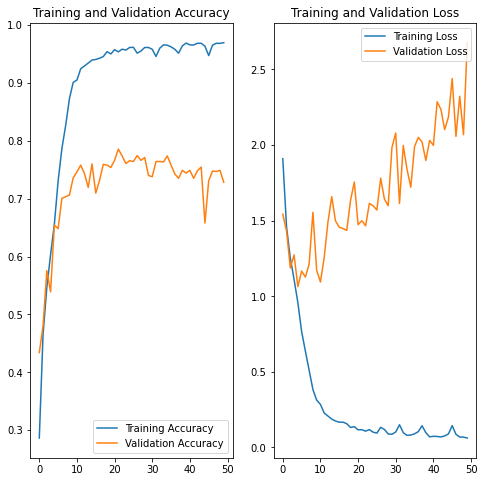

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Analyzing the results.

#####Rebalancing the data classes ended up being very useful as it allowed us to achieve great results, eliminating both the underfitting issue and the overfitting issue. After rebalancing the new accuracy for validation dataset increased drastically from 51% to 73%